In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [7]:
df = pd.read_csv('cars.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


<AxesSubplot:xlabel='speed', ylabel='dist'>

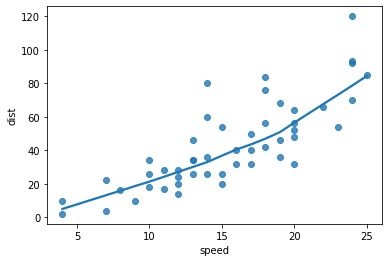

In [8]:
#산점도&선형적인 패턴 확인
#독립변수:speed, 종속변수:dist
sns.regplot('speed', 'dist', data=df, lowess=True)

Text(0.5, 1.0, 'car dist')

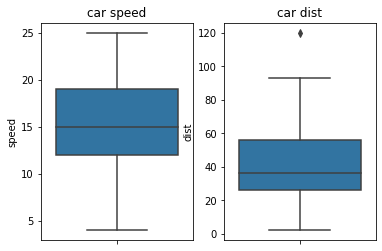

In [10]:
#박스플랏 -> 극단값 확인
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot('speed', data=df, ax=ax1, orient='v')
ax1.set_title('car speed')

sns.boxplot('dist', data=df, ax=ax2, orient='v') #극단치 존재
ax2.set_title('car dist')

In [ ]:
#선형회구분석 : 독립변수와 종속변수가 정규분포를 따를 때 잘 작동
#밀도 플랏  정규분포 형태 확인

Text(0.5, 1.0, 'car dist')

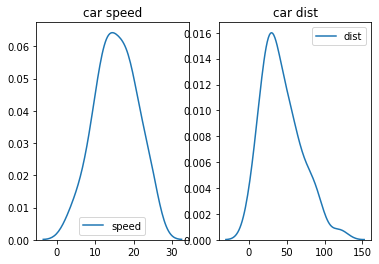

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.kdeplot(df.speed, ax=ax1)
ax1.set_title('car speed')

sns.kdeplot(df.dist, ax=ax2)
ax2.set_title('car dist')

In [12]:
#각 그래프 왜도 구하기
print(scipy.stats.skew(df.speed))
print(scipy.stats.skew(df.dist))

-0.11395477012828319
0.7824835173114966


In [13]:
#회귀분석 함수 가져오기
from statsmodels.formula.api import ols

In [18]:
res = ols("dist~speed", data=df).fit() #종속변수~독립변수 #선형회귀모델 생성
res.summary()#회귀모델요약정보
"""
R-squared : 모델설명력, dist의 분산특성의 65%를 speed가 설명
prob(F-statistic) : p-value를 의미. 통계적 의미성의 수치 (0.05보다 작아야함)
coef : 회귀계수의 추정치 
    ex) 회귀계수를 이용한 회귀모델 식 : dist = 3.9324*speed + (-17.5791)
"""
# 결론(회귀분석 결과) : dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모델은 통계적으로 유의미하다.
# =>근거 : F-statistic:	89.57, Prob (F-statistic):	1.49e-12
# 독립변수에 대하여 speed의 회귀계수는 3.9324로 dist에 대하여 유의미한 예측 변수라는 것이 나타남
# => 각 변수에 대한 p-value가 0.05이하이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.49e-12
Time:                        14:29:50   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""